In [6]:
import pandas as pd

df = pd.read_csv("datasets/healthy_lifestyle_city_2021.csv", sep=",")
df.head(3)

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,1,1858,£1.92,20.40%,81.2,30.93,1434,7.44,422,1048,£34.90
1,Sydney,2,2636,£1.48,29.00%,82.1,26.86,1712,7.22,406,1103,£41.66
2,Vienna,3,1884,£1.94,20.10%,81.0,17.33,1501,7.29,132,1008,£25.74


In [7]:
import numpy as np

df["Cost of a bottle of water(City)"] = df["Cost of a bottle of water(City)"].str.replace("£", "").astype(np.float_)
df["Cost of a bottle of water(City)"].head(3)

0    1.92
1    1.48
2    1.94
Name: Cost of a bottle of water(City), dtype: float64

In [8]:
df["Cost of a monthly gym membership(City)"] = df["Cost of a monthly gym membership(City)"].str.replace("£", "").astype(np.float_)
df["Cost of a monthly gym membership(City)"].head(3)

0    34.90
1    41.66
2    25.74
Name: Cost of a monthly gym membership(City), dtype: float64

In [9]:
df["Obesity levels(Country)"] = df["Obesity levels(Country)"].str.replace("%", "").astype(np.float_)
df["Obesity levels(Country)"].head(3)

0    20.4
1    29.0
2    20.1
Name: Obesity levels(Country), dtype: float64

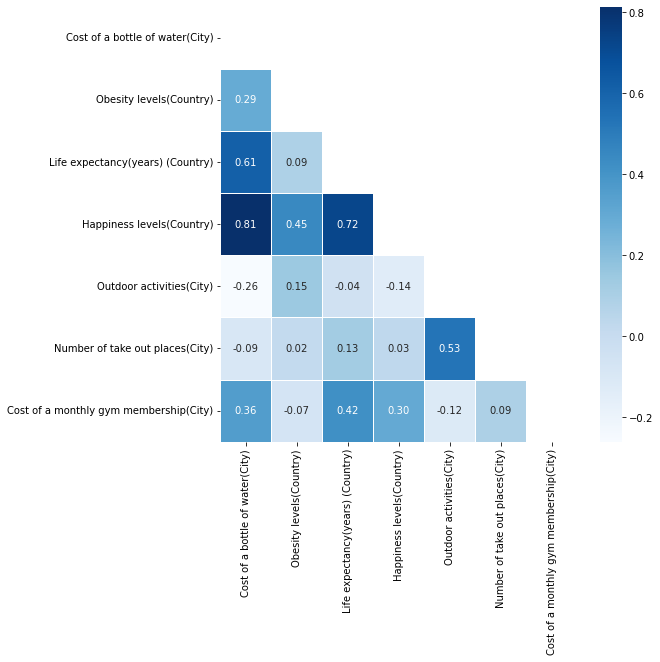

In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.iloc[:, 2:].corr()

fig, ax = plt.subplots(figsize=(8, 8))
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True
heat_map = sns.heatmap(corr, linewidths=0.5, mask=mask, annot=True, fmt=".2f", cmap="Blues", ax=ax)

In [18]:
from scipy import stats
from numpy.core._exceptions import UFuncTypeError

corr_data = dict()
score = df["Happiness levels(Country)"]

for col in df.columns[2:]:
    try: 
        data = df[col]
        coef, p_value = stats.pearsonr(score, data)
        if (p_value < 0.05) and (coef > 0.5):
            corr_data[col] = coef
    except UFuncTypeError as exp:
        # 기록되지 않은 데이터 '-'가 포함된 항목은 제외
        pass
   
print(*corr_data.items(), sep="\n")

('Cost of a bottle of water(City)', 0.8131592732718269)
('Life expectancy(years) (Country)', 0.7245870841569989)
('Happiness levels(Country)', 0.9999999999999998)
